# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
## 1. Business Understanding
# Goal: Help used car dealerships identify what features influence car price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
## 2. Data Understanding
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv("/content/vehicles.csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
## 3. Data Preparation
# Clean price column
df = df[(df['price'] > 100) & (df['price'] < 100000)]

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'region', 'VIN'])

In [ ]:
# Drop missing values in essential columns
essential_columns = ['year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission', 'drive']
df = df.dropna(subset=essential_columns)

In [ ]:
# Feature engineering: car age
df['car_age'] = 2025 - df['year']

In [ ]:
# Final selected columns
df = df[['price', 'car_age', 'odometer', 'manufacturer', 'fuel', 'transmission', 'drive', 'type']]
df = df.dropna()

print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (227587, 8)


,price,car_age,odometer,manufacturer,fuel,transmission,drive,type
31,15000,12.0,128000.0,ford,gas,automatic,rwd,truck
32,27990,13.0,68696.0,gmc,gas,other,4wd,pickup
33,34590,9.0,29499.0,chevrolet,gas,other,4wd,pickup
34,35000,6.0,43000.0,toyota,gas,automatic,4wd,truck
35,29990,9.0,17302.0,chevrolet,gas,other,4wd,pickup


In [ ]:
## 4. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

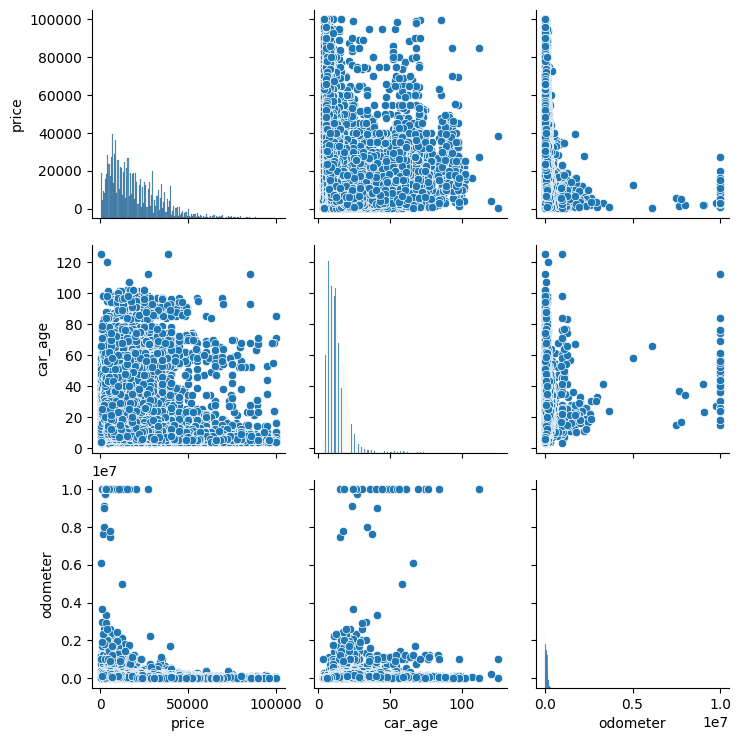

In [ ]:
# Correlation
sns.pairplot(df[['price', 'car_age', 'odometer']])
plt.show()

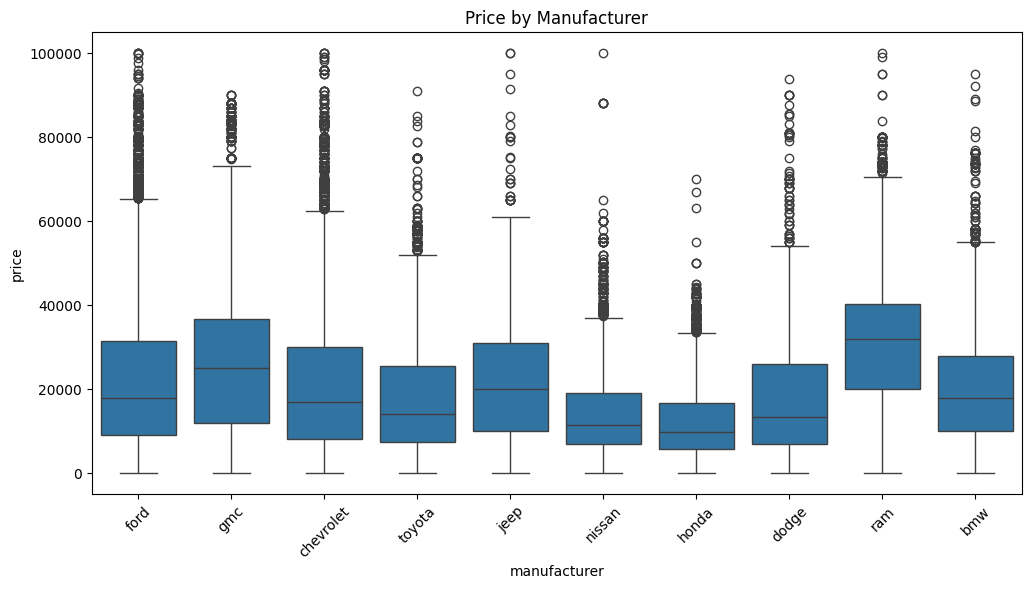

In [ ]:
# Boxplot by manufacturer
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['manufacturer'].isin(df['manufacturer'].value_counts().head(10).index)],
            x='manufacturer', y='price')
plt.xticks(rotation=45)
plt.title("Price by Manufacturer")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
## 5. Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df.drop(columns='price')
y = df['price']

In [ ]:
# One-hot encode categorical columns
categorical_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type']
numeric_features = ['car_age', 'odometer']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
## 6. Feature Importance (Optional)
import numpy as np

# Extract feature names
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_features).tolist() + numeric_features

# Feature importances
importances = model.named_steps['regressor'].feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.